In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/siim-medical-images/full_archive.npz
/kaggle/input/siim-medical-images/overview.csv
/kaggle/input/siim-medical-images/dicom_dir/ID_0015_AGE_0061_CONTRAST_1_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0019_AGE_0070_CONTRAST_1_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0063_AGE_0073_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0077_AGE_0074_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0073_AGE_0074_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0060_AGE_0080_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0051_AGE_0063_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0091_AGE_0072_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0004_AGE_0056_CONTRAST_1_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0076_AGE_0068_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images/dicom_dir/ID_0055_AGE_0071_CONTRAST_0_CT.dcm
/kaggle/input/siim-medical-images

In [2]:
!pip install scikit-image

In [3]:
import pandas as pd
import numpy as np
import os
import glob

from skimage.io import imread
import matplotlib.pyplot as plt

In [4]:
BASE_PATH = '/kaggle/input/siim-medical-images/'
overview_df = pd.read_csv(os.path.join(BASE_PATH, 'overview.csv'), index_col=0)

In [5]:
overview_df.head()

,Age,Contrast,ContrastTag,raw_input_path,id,tiff_name,dicom_name
0,60,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (1).dcm,0,ID_0000_AGE_0060_CONTRAST_1_CT.tif,ID_0000_AGE_0060_CONTRAST_1_CT.dcm
1,69,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (10).dcm,1,ID_0001_AGE_0069_CONTRAST_1_CT.tif,ID_0001_AGE_0069_CONTRAST_1_CT.dcm
2,74,True,APPLIED,../data/50_50_dicom_cases\Contrast\00001 (11).dcm,2,ID_0002_AGE_0074_CONTRAST_1_CT.tif,ID_0002_AGE_0074_CONTRAST_1_CT.dcm
3,75,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (12).dcm,3,ID_0003_AGE_0075_CONTRAST_1_CT.tif,ID_0003_AGE_0075_CONTRAST_1_CT.dcm
4,56,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (13).dcm,4,ID_0004_AGE_0056_CONTRAST_1_CT.tif,ID_0004_AGE_0056_CONTRAST_1_CT.dcm


In [6]:
overview_df.tail()

,Age,Contrast,ContrastTag,raw_input_path,id,tiff_name,dicom_name
95,71,False,NONE,../data/50_50_dicom_cases\No contrast\000001 (...,95,ID_0095_AGE_0071_CONTRAST_0_CT.tif,ID_0095_AGE_0071_CONTRAST_0_CT.dcm
96,83,False,NONE,../data/50_50_dicom_cases\No contrast\000001 (...,96,ID_0096_AGE_0083_CONTRAST_0_CT.tif,ID_0096_AGE_0083_CONTRAST_0_CT.dcm
97,60,False,NONE,../data/50_50_dicom_cases\No contrast\000001 (...,97,ID_0097_AGE_0060_CONTRAST_0_CT.tif,ID_0097_AGE_0060_CONTRAST_0_CT.dcm
98,61,False,NONE,../data/50_50_dicom_cases\No contrast\000001 (...,98,ID_0098_AGE_0061_CONTRAST_0_CT.tif,ID_0098_AGE_0061_CONTRAST_0_CT.dcm
99,61,False,NONE,../data/50_50_dicom_cases\No contrast\000001 (...,99,ID_0099_AGE_0061_CONTRAST_0_CT.tif,ID_0099_AGE_0061_CONTRAST_0_CT.dcm


In [7]:
all_images = glob.glob(os.path.join(BASE_PATH, 'tiff_images', '*.tif'))
all_images

['/kaggle/input/siim-medical-images/tiff_images/ID_0027_AGE_0064_CONTRAST_1_CT.tif',
 '/kaggle/input/siim-medical-images/tiff_images/ID_0096_AGE_0083_CONTRAST_0_CT.tif',
 '/kaggle/input/siim-medical-images/tiff_images/ID_0073_AGE_0074_CONTRAST_0_CT.tif',
 '/kaggle/input/siim-medical-images/tiff_images/ID_0046_AGE_0072_CONTRAST_1_CT.tif',
 '/kaggle/input/siim-medical-images/tiff_images/ID_0052_AGE_0072_CONTRAST_0_CT.tif',
 '/kaggle/input/siim-medical-images/tiff_images/ID_0015_AGE_0061_CONTRAST_1_CT.tif',
 '/kaggle/input/siim-medical-images/tiff_images/ID_0009_AGE_0048_CONTRAST_1_CT.tif',
 '/kaggle/input/siim-medical-images/tiff_images/ID_0048_AGE_0077_CONTRAST_1_CT.tif',
 '/kaggle/input/siim-medical-images/tiff_images/ID_0020_AGE_0066_CONTRAST_1_CT.tif',
 '/kaggle/input/siim-medical-images/tiff_images/ID_0055_AGE_0071_CONTRAST_0_CT.tif',
 '/kaggle/input/siim-medical-images/tiff_images/ID_0077_AGE_0074_CONTRAST_0_CT.tif',
 '/kaggle/input/siim-medical-images/tiff_images/ID_0086_AGE_0073_

In [8]:
first_img = imread(all_images[0])
first_img.shape

(512, 512)

In [9]:
first_img

array([[-1024., -1024., -1024., ..., -1024., -1024., -1024.],
       [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
       [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
       ...,
       [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
       [-1024., -1024., -1024., ..., -1024., -1024., -1024.],
       [-1024., -1024., -1024., ..., -1024., -1024., -1024.]])

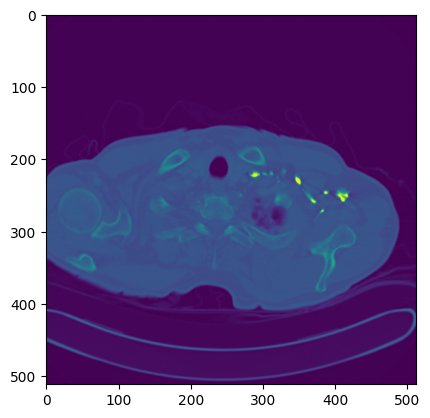

In [10]:
# Image with contrast 
plt.imshow(first_img)

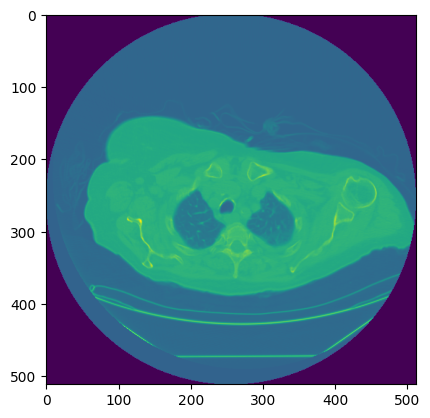

In [11]:
# Image without contrast
plt.imshow(imread(all_images[1]));
# plt.imshow(np.expand_dims(imread(os.path.join(BASE_PATH, 'tiff_images', all_images[1])).astype(np.float32)[::2,::2],0))

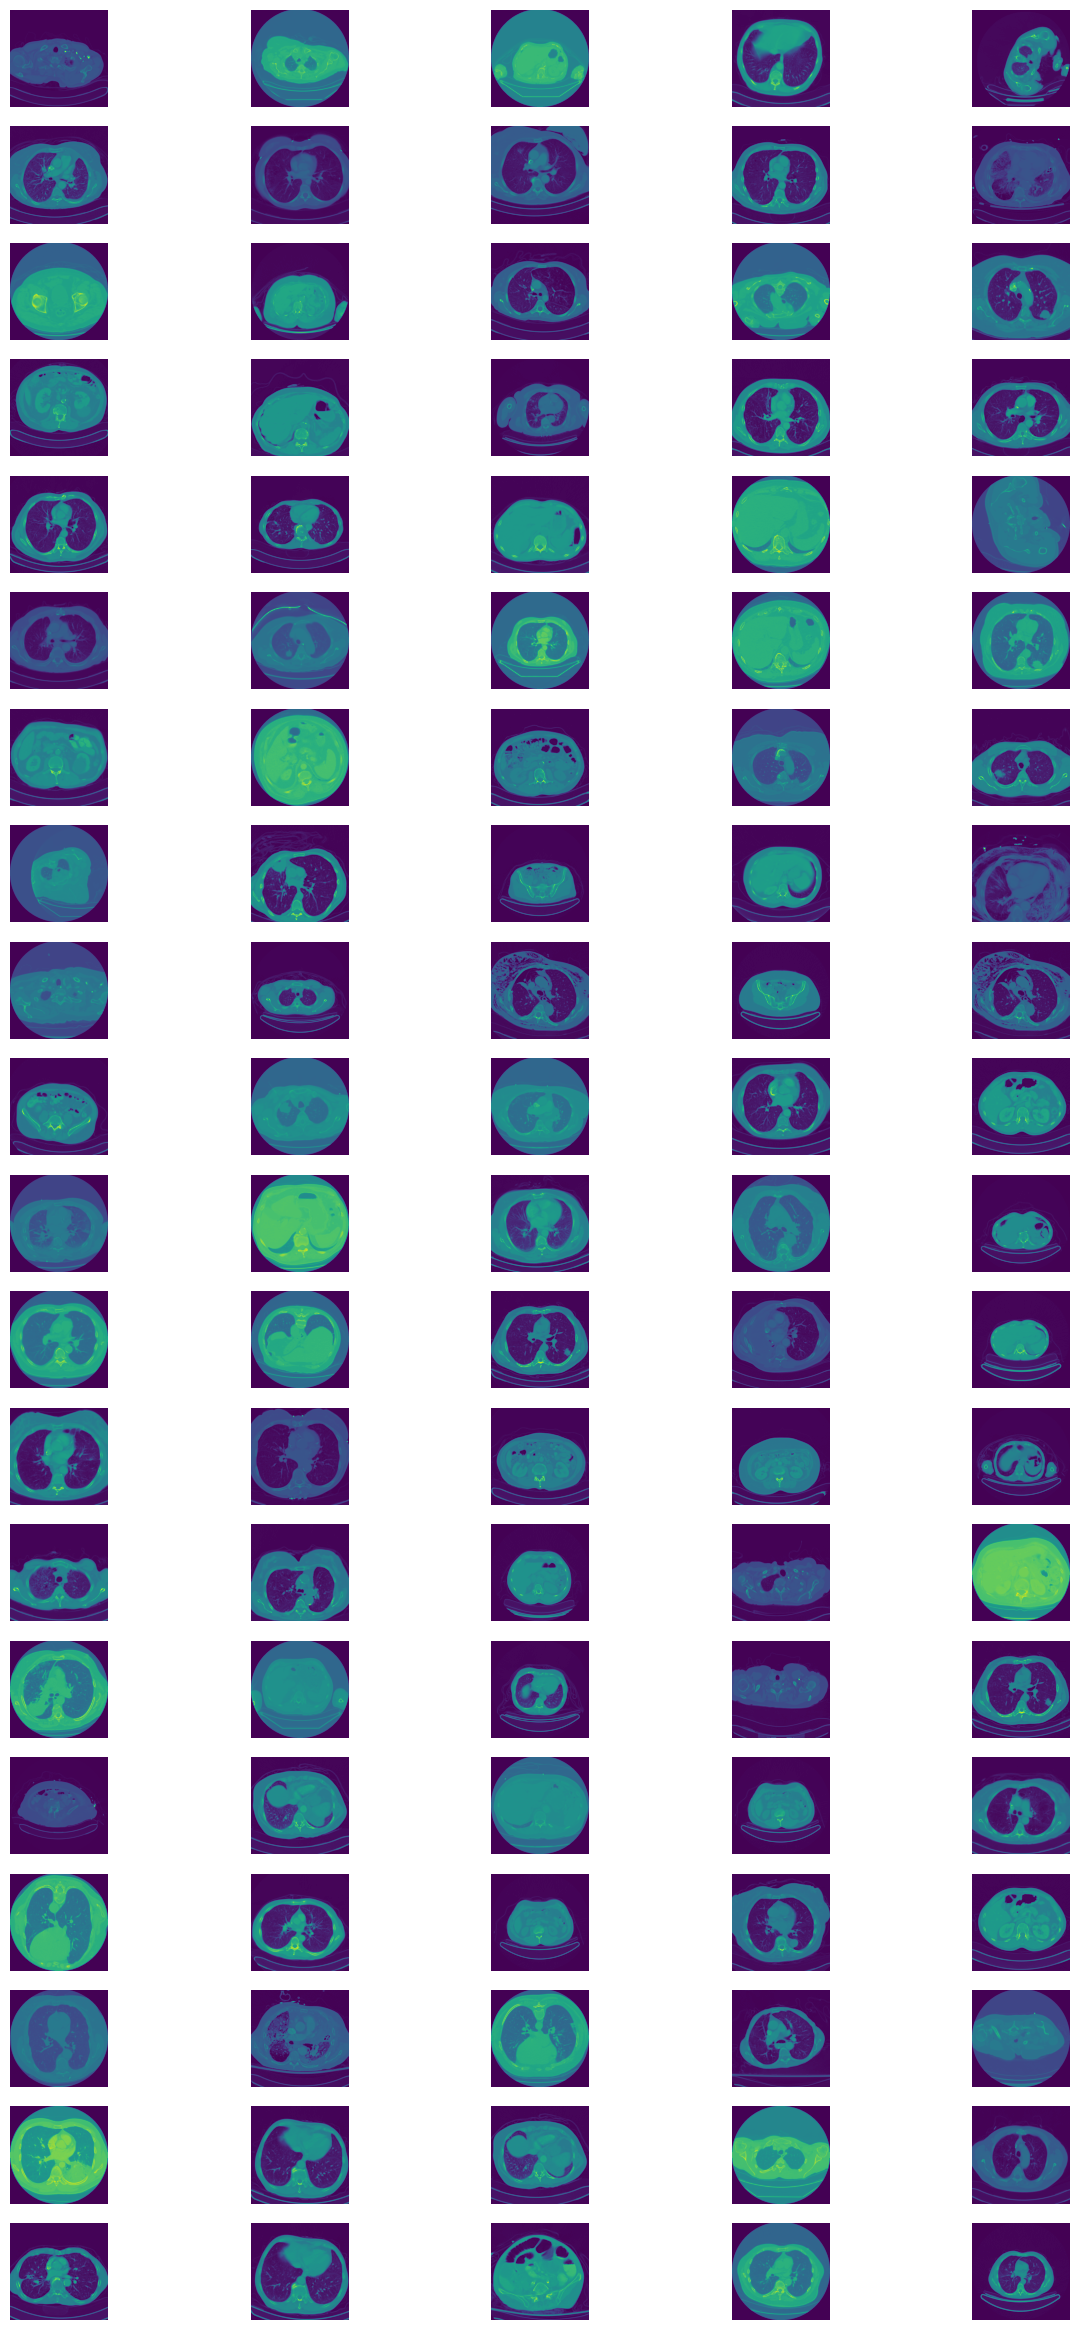

In [12]:
fig, axs = plt.subplots(20, 5, figsize=(15, 30))

ax = axs.flatten()
for i in range(len(all_images)):
    ax[i].imshow(imread(all_images[i]))
    ax[i].axis('off')

In [13]:
overview_df['label'] = overview_df['Contrast'].astype('int')

In [14]:
# This is illustrate how we take alternate pizel of image and still maintain same image
print(np.array(range(100)).reshape(10,10))

print(np.array(range(100)).reshape(10,10)[::2,::2])

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]
[[ 0  2  4  6  8]
 [20 22 24 26 28]
 [40 42 44 46 48]
 [60 62 64 66 68]
 [80 82 84 86 88]]


In [15]:
overview_df['image'] = overview_df['tiff_name'].map(lambda x:  np.expand_dims(imread(os.path.join(BASE_PATH, 'tiff_images', x)).astype(np.float32)[::2,::2],0))

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(overview_df['image'].values, 
                                                    overview_df['label'].values,
                                                    random_state=123, test_size=0.1)

In [18]:
X_train[0].shape

(1, 256, 256)

In [19]:
from torch.utils.data import DataLoader, Dataset
import torch
import torch.nn as nn
import torch.optim as optim


In [20]:
class MyDataLoader(Dataset):
    def __init__(self, image_arr, labels):
        self.images = image_arr
        self.labels = labels
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        return self.images[idx], self.labels[idx]

In [22]:
batch_size = 20
train_dataset = MyDataLoader(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size)
test_dataset = MyDataLoader(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [23]:
len(train_loader)

5

In [24]:
import torch.nn as nn

class BinaryImageClassifier(nn.Module):
    def __init__(self):
        super(BinaryImageClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2)
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=4, stride=1, padding=2)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 64 * 64, 128)
        self.fc2 = nn.Linear(128, 2)  # Output layer without activation

    def forward(self, x):
        x = self.pool1(nn.functional.relu(self.conv1(x)))
        x = self.pool2(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 64 * 64)
        x = nn.functional.relu(self.fc1(x))
        logits = self.fc2(x)  # Raw logits, no activation
        # returning logits as we get more granular representation rather than returning class
        return logits


In [25]:
# Define your model
model = BinaryImageClassifier()

criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for binary classification

optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 10


In [26]:
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for images, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backpropagation and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}")


Epoch 1, Loss: 9658.657065963745
Epoch 2, Loss: 257.25827207565305
Epoch 3, Loss: 1.8119518280029296
Epoch 4, Loss: 0.6293114185333252
Epoch 5, Loss: 0.597166895866394
Epoch 6, Loss: 0.41590259671211244
Epoch 7, Loss: 0.17573389261960984
Epoch 8, Loss: 0.07119105448946357
Epoch 9, Loss: 0.01772284253966063
Epoch 10, Loss: 0.0038473182736197486


In [27]:
labels

tensor([1, 1, 0, 1, 0, 0, 0, 1, 0, 0])

In [28]:
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

actual = []
predictions = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        actual.extend(labels.detach().tolist())
        predictions.extend(predicted.detach().tolist())

print(f"Accuracy on test data: {100 * correct / total}%")

Accuracy on test data: 50.0%


In [29]:
from sklearn.metrics import classification_report
print(classification_report(actual, predictions))

              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.50      0.40      0.44         5

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.49        10
weighted avg       0.50      0.50      0.49        10

